In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# importer la base de données de test
db =pd.read_csv('dataForRegression.csv', sep=";" ,encoding = "ISO-8859-1")

db=db.stack().str.replace(',','.').unstack()

db=db.drop(['Date/Heure'],axis=1)
db=db.iloc[1:] # supprimer la ligne des unités
db.iloc[:,:] = db.iloc[:,:].astype(float)




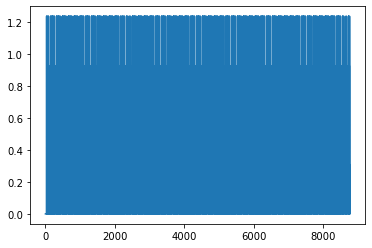

In [18]:
plt.plot(db["Informatiques + Equip."])

In [75]:
X=db[["Température Sèche Air Extérieur","Température d'air","Apports solaires Fenêtres extérieures"]].values
y=db[["Informatiques + Equip."]].values*16/float(db[["Informatiques + Equip."]].max())


#print(train.shape, test.shape)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

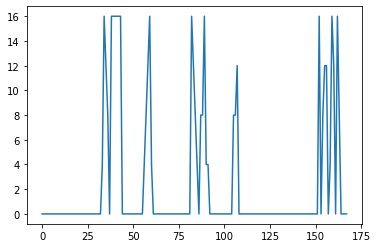

In [76]:
plt.plot(y[0:168])

In [77]:
X

array([[-1.64292182, -2.59393156, -0.73747872],
       [-2.16873578, -2.69224331, -0.73747872],
       [-2.36493502, -2.72567772, -0.73747872],
       ...,
       [-1.08179199, -0.71561013, -0.73747872],
       [-1.29761116, -0.88672193, -0.73747872],
       [-1.58013806, -0.98381692, -0.73747872]])

In [78]:
y.max()

16.0

In [79]:
# Create train/test
X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.25, random_state=42)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(64, activation='relu')) # Hidden 2
model.add(Dense(32, activation='relu')) # Hidden 2


model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
206/206 - 0s - loss: 19.8045 - val_loss: 13.5452
Epoch 2/1000
206/206 - 0s - loss: 13.4753 - val_loss: 12.7244
Epoch 3/1000
206/206 - 0s - loss: 13.1317 - val_loss: 12.8713
Epoch 4/1000
206/206 - 0s - loss: 13.0705 - val_loss: 12.6681
Epoch 5/1000
206/206 - 0s - loss: 12.9512 - val_loss: 12.2226
Epoch 6/1000
206/206 - 0s - loss: 12.7879 - val_loss: 12.1501
Epoch 7/1000
206/206 - 0s - loss: 12.6993 - val_loss: 12.5728
Epoch 8/1000
206/206 - 0s - loss: 12.6728 - val_loss: 11.9717
Epoch 9/1000
206/206 - 0s - loss: 12.6323 - val_loss: 12.1797
Epoch 10/1000
206/206 - 0s - loss: 12.4900 - val_loss: 12.0194
Epoch 11/1000
206/206 - 0s - loss: 12.4656 - val_loss: 12.0552
Epoch 12/1000
206/206 - 0s - loss: 12.4654 - val_loss: 11.9987
Epoch 13/1000
206/206 - 0s - loss: 12.3643 - val_loss: 11.9648
Epoch 14/1000
206/206 - 0s - loss: 12.3603 - val_loss: 11.9400
Epoch 15/1000
206/206 - 0s - loss: 12.3329 - val_loss: 12.0628
Epoch 16/1000
206/206 - 0s - loss: 12.4867 - val_loss: 12.4171
E

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [82]:
from sklearn import metrics

# Predict
y_pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(y_pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 11.81780665972606


In [83]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.4377036899253053


In [84]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

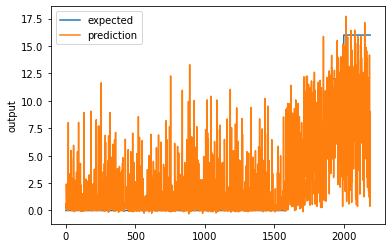

In [85]:

# Plot the chart
chart_regression(y_pred.flatten(),y_test)

In [86]:
y_test

array([[12.00000323],
       [ 3.99999677],
       [ 0.        ],
       ...,
       [ 0.        ],
       [ 0.        ],
       [16.        ]])

In [87]:
y_pred.max()

17.715408

In [88]:
y.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
y_pred.flatten()

array([9.416794  , 3.3705945 , 0.44152406, ..., 2.4623744 , 2.945189  ,
       8.608681  ], dtype=float32)

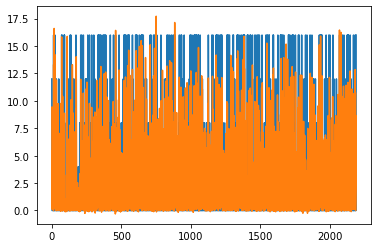

In [90]:
plt.plot(y_test)
plt.plot(y_pred)

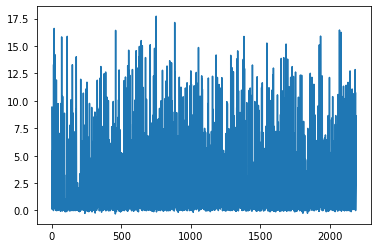

In [91]:
plt.plot(y_pred)